In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
file_path = './boston_dataset.csv'
data = pd.read_csv(file_path)

In [4]:
print(data.head())

   ID     crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0   1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1   2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2   4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
3   5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
4   7  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   

   ptratio   black  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     18.7  394.63   2.94  33.4  
3     18.7  396.90   5.33  36.2  
4     15.2  395.60  12.43  22.9  


In [5]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


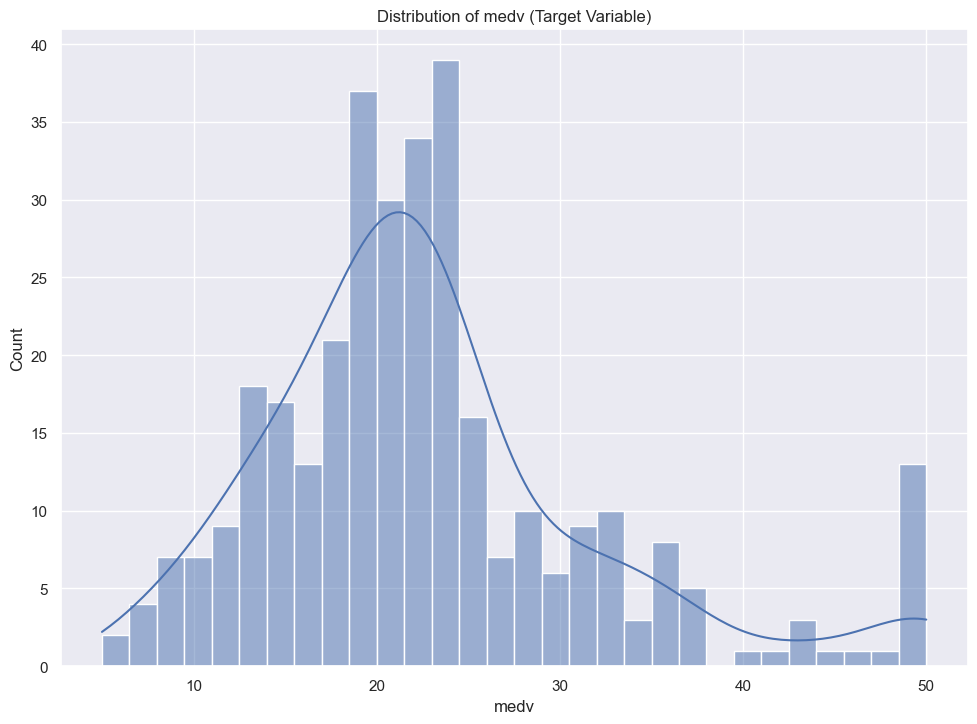

In [6]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.histplot(data['medv'], bins=30, kde=True)
plt.title("Distribution of medv (Target Variable)")
plt.show()

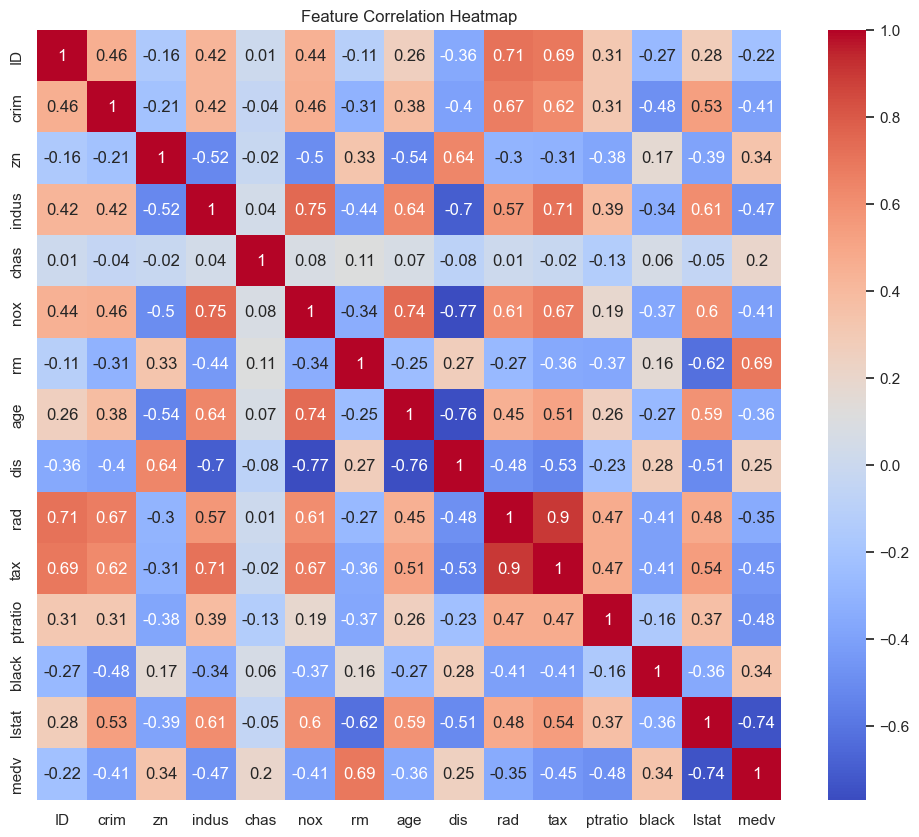

In [7]:
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
features = ["rm", "lstat"]
target = data["medv"]

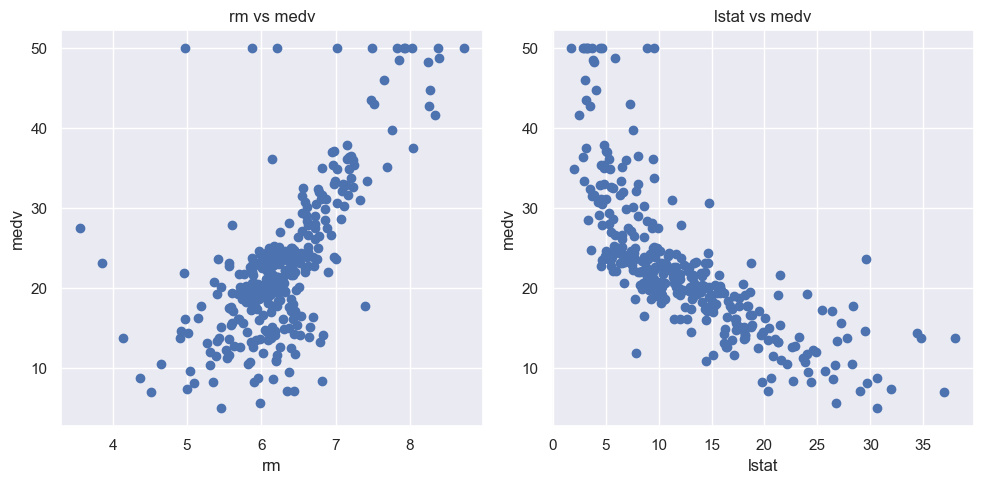

In [9]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.scatter(data[col], target, marker='o')
    plt.title(f"{col} vs medv")
    plt.xlabel(col)
    plt.ylabel("medv")
plt.tight_layout()

In [10]:
plt.show()

In [11]:
X = data[["rm", "lstat"]]
Y = data["medv"]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [14]:
Y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 28.75
